# Web Mining and Applied NLP (44-620)
# Web Scraping and NLP with Requests, BeautifulSoup, and spaCy
# Student Name: Kersha Broussard

In [1]:
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')


Package                   Version
------------------------- --------------
annotated-types           0.7.0
anyio                     4.9.0
argon2-cffi               25.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 3.0.0
async-lru                 2.0.5
attrs                     25.3.0
babel                     2.17.0
beautifulsoup4            4.13.4
bleach                    6.2.0
blis                      1.3.0
catalogue                 2.0.10
certifi                   2025.7.14
cffi                      1.17.1
charset-normalizer        3.4.2
click                     8.2.1
cloudpathlib              0.21.1
colorama                  0.4.6
comm                      0.2.2
confection                0.1.5
contourpy                 1.3.2
cycler                    0.12.1
cymem                     2.0.11
debugpy                   1.8.15
decorator                 5.2.1
defusedxml                0.7.1
executing                 2.2.0
fastjsonschema


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### 1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [2]:
import requests
import pickle

# URL of the article from the Wayback Machine
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

# Fetch the article HTML
response = requests.get(url)
html_content = response.text

# Save HTML to a .pkl file
with open("laser_headlights_article.pkl", "wb") as file:
    pickle.dump(html_content, file)

print("‚úÖ HTML content saved to laser_headlights_article.pkl")


‚úÖ HTML content saved to laser_headlights_article.pkl


### 2. Read in your article's html source from the file you created in question 1 and print it's text (use .get_text())

In [5]:
import pickle
from bs4 import BeautifulSoup
!pip install html5lib


# Load the HTML from the pickle file
with open("laser_headlights_article.pkl", "rb") as file:
    html_content = pickle.load(file)

# Parse the HTML using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Extract and print the plain text
article_text = soup.get_text()
print(article_text[:1500])  # print first 1500 characters to preview



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


















How Laser Headlights Work | Hackaday






































































Skip to content






Hackaday


Primary Menu

Home
Blog
Hackaday.io
Tindie
Hackaday Prize
Submit
About


Search for:



 March 27, 2021 






How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren‚Äôt usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn‚Äôt mean there aren‚Äôt thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM‚Äôs pr

### 3. Load the article text into a trained spaCy pipeline, and determine the 5 most frequent tokens (converted to lower case). Print the common tokens with an appropriate label. Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [7]:
import spacy
from collections import Counter

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Run spaCy pipeline on the article text
doc = nlp(article_text)

# Filter and lowercase tokens
tokens = [
    token.text.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count and display top 5 frequent tokens
token_freq = Counter(tokens)
most_common_tokens = token_freq.most_common(5)

print("Top 5 most frequent tokens (lowercase, filtered):")
for token, freq in most_common_tokens:
    print(f"{token}: {freq}")


Top 5 most frequent tokens (lowercase, filtered):
comment: 136
march: 133
2021: 133
says: 132
report: 130


### 4. Load the article text into a trained spaCy pipeline, and determine the 5 most frequent lemmas (converted to lower case). Print the common lemmas with an appropriate label. Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [8]:
# Filter and lowercase lemmas
lemmas = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count and display top 5 frequent lemmas
lemma_freq = Counter(lemmas)
most_common_lemmas = lemma_freq.most_common(5)

print("Top 5 most frequent lemmas (lowercase, filtered):")
for lemma, freq in most_common_lemmas:
    print(f"{lemma}: {freq}")


Top 5 most frequent lemmas (lowercase, filtered):
comment: 157
say: 134
march: 133
2021: 133
report: 130


### 5. Define the following methods:
score_sentence_by_token(sentence, interesting_token) that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
score_sentence_by_lemma(sentence, interesting_lemmas) that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence

You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well). Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [10]:
# Get the first sentence from the spaCy doc
first_sentence = list(doc.sents)[0].text

# Extract token and lemma lists from earlier
interesting_tokens = [token for token, _ in most_common_tokens]
interesting_lemmas = [lemma for lemma, _ in most_common_lemmas]

# Score it
print("Token-based score:", score_sentence_by_token(first_sentence, interesting_tokens))
print("Lemma-based score:", score_sentence_by_lemma(first_sentence, interesting_lemmas))


Token-based score: 0.08620689655172414
Lemma-based score: 0.10344827586206896


### 6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

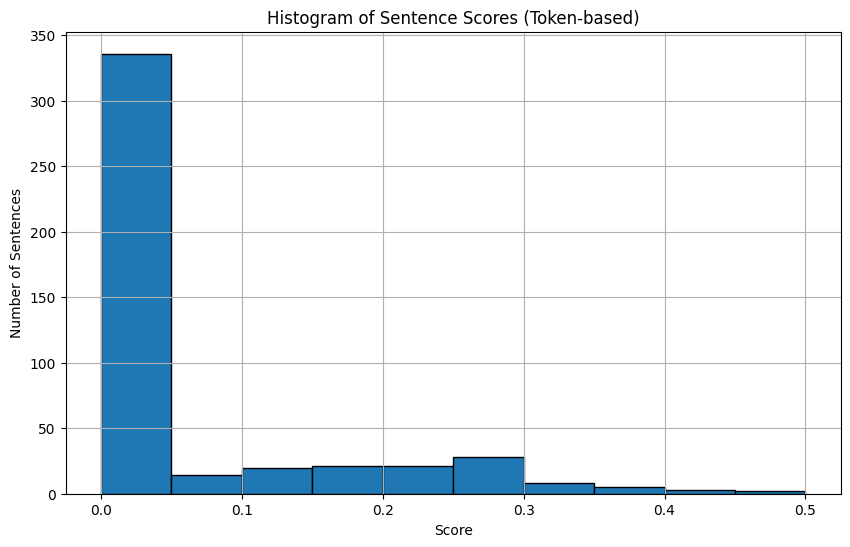

In [11]:
import matplotlib.pyplot as plt

# Create a list of scores (using tokens)
token_scores = [score_sentence_by_token(sent.text, interesting_tokens) for sent in doc.sents]

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(token_scores, bins=10, edgecolor='black')
plt.title("Histogram of Sentence Scores (Token-based)")
plt.xlabel("Score")
plt.ylabel("Number of Sentences")
plt.grid(True)
plt.show()


# üìù Comment on the result
### Most common score range appears to be between 0.0 and 0.1 based on the histogram.

### 7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

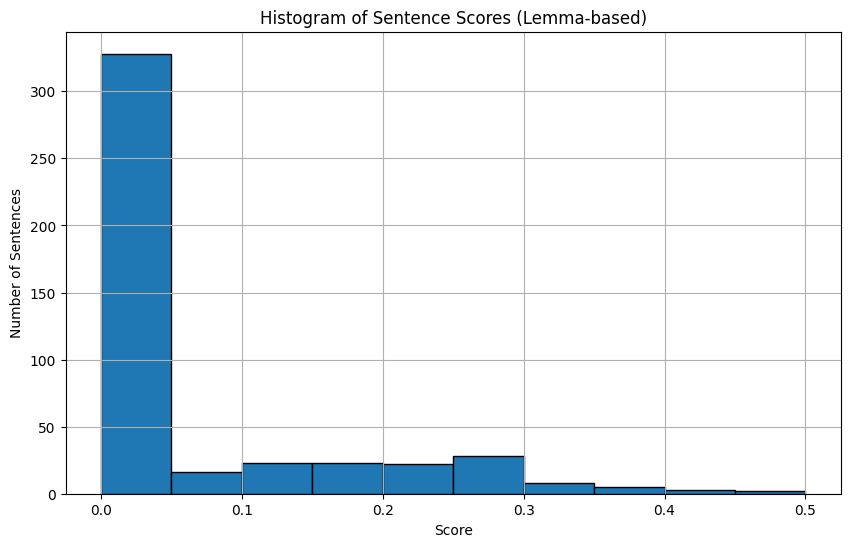

In [12]:
# Score each sentence based on interesting lemmas
lemma_scores = [score_sentence_by_lemma(sent.text, interesting_lemmas) for sent in doc.sents]

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(lemma_scores, bins=10, edgecolor='black')
plt.title("Histogram of Sentence Scores (Lemma-based)")
plt.xlabel("Score")
plt.ylabel("Number of Sentences")
plt.grid(True)
plt.show()



# üìù Comment
### Most common score range seems to fall between 0.0 and 0.1 again, suggesting few lemmas repeat frequently within single sentences.

### 8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words? How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

#### * To filter tokens or lemmas to include only nouns, you can use the .pos_ attribute in spaCy, which identifies a token‚Äôs part of speech.
This is how I'd modify token frequency logic from Task 3 or 4:

#### *Only keep tokens that are nouns, not punctuation, stopwords, or whitespace
nouns = [token.text.lower() for token in doc 
         if token.is_alpha 
         and not token.is_stop 
         and token.pos_ == "NOUN"]
          

#### * For lemmas:

nouns_lemmas = [token.lemma_.lower() for token in doc 
                if token.is_alpha 
                and not token.is_stop 
                and token.pos_ == "NOUN"]

                * Then I could still use the Counter(nouns) or Counter(nouns_lemmas) just like before to get the top 5 frequent items.



##### * For token frequency logic from Task 3 or 4:

In [13]:
# Only keep tokens that are nouns, not punctuation, stopwords, or whitespace
nouns = [token.text.lower() for token in doc 
         if token.is_alpha 
         and not token.is_stop 
         and token.pos_ == "NOUN"]


##### * For Lemmas 

In [14]:
nouns_lemmas = [token.lemma_.lower() for token in doc 
                if token.is_alpha 
                and not token.is_stop 
                and token.pos_ == "NOUN"]
